## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#combinded_mouse_df = mouse_metadata.merge(study_results, how='left', on='Mouse ID', sort=False)
#final_mouse_df = combinded_mouse_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
#final_mouse_df.head()

combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")


# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
count_mouse = combined_df["Mouse ID"].nunique()

# Display the data table for preview (data confirmed in excel)
count_mouse

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
#duplicate_rows
duplicate_rows = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Display the data table
duplicate_rows #(I think this is close, but for some reason the output doesn't seem correct, will revisit later)

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_df.loc[combined_df["Mouse ID"] == "g989"]

# Display the data table
all_duplicate_rows

#

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_rows)==False]

# Display the data table
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
# Will revisit this one later.
count_mice = clean_df['Mouse ID'].nunique()
count_mice

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_group = clean_df.groupby("Drug Regimen")
print(drug_regimen_group["Mouse ID"].count())
avg = drug_regimen_group['Tumor Volume (mm3)'].mean()
med = drug_regimen_group['Tumor Volume (mm3)'].median()
var = drug_regimen_group['Tumor Volume (mm3)'].var()
stdv =drug_regimen_group['Tumor Volume (mm3)'].std()
sem =drug_regimen_group['Tumor Volume (mm3)'].sem()

regimen_summary_df = pd.DataFrame({"Average": avg,"Median":med,"Variance": var,"Standard Deviation":stdv,"Sem":sem})

# Display the data table
regimen_summary_df


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,Average,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

# Display the data table
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mouse tested')

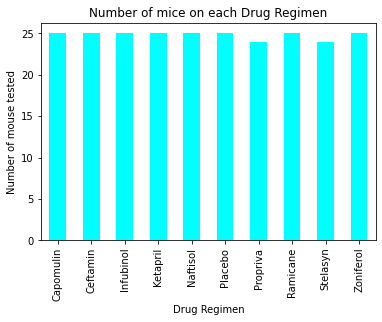

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_data = clean_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
ax = mice_data.plot(kind="bar",title ="Number of mice on each Drug Regimen",facecolor="cyan")
ax.set_ylabel("Number of mouse tested")

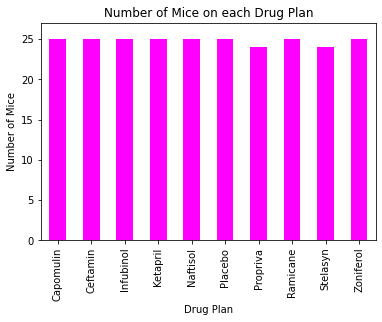

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
reg = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
x_axis = np.arange(0, len(reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice on each Drug Plan")
plt.xlabel("Drug Plan")
plt.ylabel("Number of Mice")

plt.xlim(-0.5, len(mice_data)-0.5)
plt.ylim(0,mice_data.max() +2)

plt.bar(reg.index, reg, facecolor="magenta",align="center",width=0.5)
plt.xticks(tick_locations, reg.index,rotation="vertical")

# Display the bar graph
plt.show()


Male      125
Female    123
Name: Sex, dtype: int64

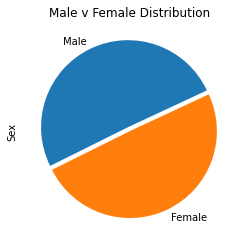

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_df[["Mouse ID", "Sex"]].drop_duplicates()

colors = ["green","yellow"]
explode=(0.05,0)

sex_distribution = mouse_gender["Sex"].value_counts()
s = sex_distribution.plot(kind="pie", title="Male v Female Distribution", startangle=25, explode=explode)

# Display the pie chart
sex_distribution


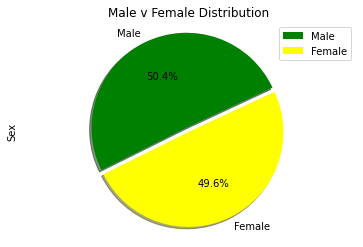

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index,colors=colors,autopct="%1.1f%%", shadow=True, startangle=25, explode=explode)
plt.axis("equal")
plt.title("Male v Female Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")

# Display the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_df = pd.merge(clean_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])

In [36]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in list_of_drugs:
    volume_df = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    iqr = quartiles[0.75] - quartiles[0.25]
    
    # add subset 
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]

[[<matplotlib.axis.XTick at 0x16409c0d310>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')]]

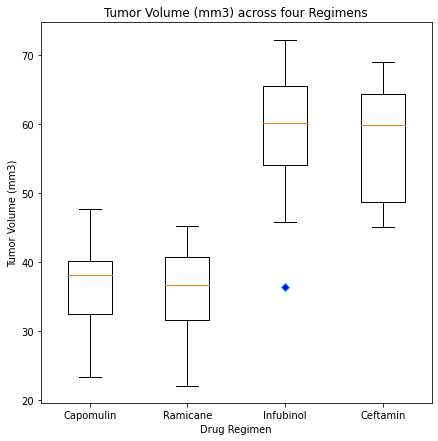

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)


## Line and Scatter Plots

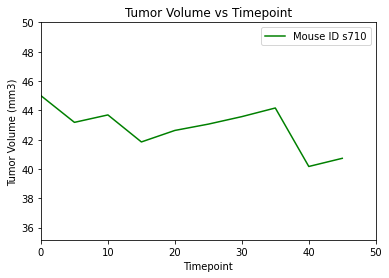

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
random_mouse = (clean_df[clean_df["Drug Regimen"]=="Capomulin"]).sample()
random_data = pd.merge(clean_df, random_mouse, on="Mouse ID", how="inner")
random_df = random_data.drop([col for col in random_data.columns if '_y' in col], axis=1)

time = random_df["Timepoint_x"]
vol = random_df["Tumor Volume (mm3)_x"]
label = random_df["Mouse ID"].unique()

# Display the line graph
line, = plt.plot(time, vol, 'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(vol.min() - 5, vol.max() + 5)
plt.legend("Mouse ID " +label)
plt.show()

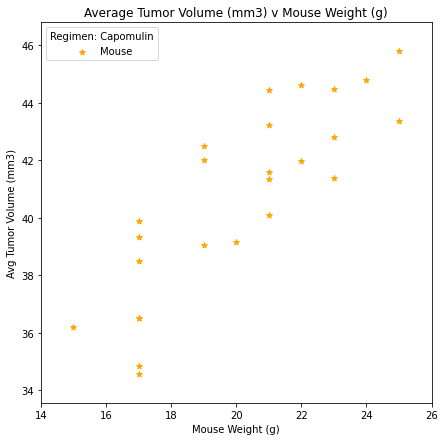

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

regimen = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
tvolume = regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()

mouse_vol_wt = pd.merge(tvolume,mouse_weight, on="Mouse ID", how="inner")
mouse_vol_wt = mouse_vol_wt.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="orange", edgecolors="orange")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

# Display the scatter plot
plt.show()


## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef = round(st.pearsonr(wt, vol)[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {corr_coef}")


The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84
